In [25]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("once")


https://alpha-vantage.readthedocs.io/en/latest/

free api key: https://www.alphavantage.co/support/#api-key


In [1]:
#!conda install -n jupyter -c ranaroussi yfinance
!pip install alpha-vantage

!pip install python-dotenv # for safe passing of sensitive info like password, api key etc
# see how to pass in secret data via env variables: https://medium.com/@yuthakarn/how-to-not-show-credential-in-jupyter-notebook-c349f9278466

from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from alpha_vantage.foreignexchange import ForeignExchange

In [2]:
# setup your os env variables
# it is expected alpha_vantage_API_KEY env variable with alpha vantage api key
# you can implement this by using .env file and python-dotenv python package

ts = TimeSeries(key=alpha_vantage_API_KEY, output_format='pandas', indexing_type='date') 
# results as json dictionaries (default), pandas dataframe (if installed) or csv, simply pass the parameter output_format='pandas'
data, meta_data = ts.get_intraday('AAPL',interval='1min', outputsize='full')
data.head(3)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-07-31 20:00:00,427.44,427.60,427.44,427.44,6166.0
2020-07-31 19:59:00,427.51,427.60,427.50,427.51,7784.0
2020-07-31 19:58:00,427.68,427.68,427.51,427.51,4337.0


In [4]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'AAPL',
 '3. Last Refreshed': '2020-07-31 20:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

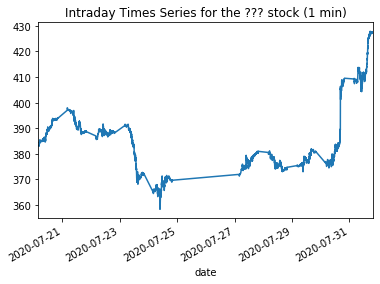

In [7]:
data['4. close'].plot()
plt.title('Intraday Times Series for the AAPL stock (1 min)')
plt.show()

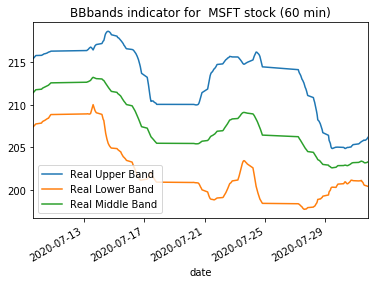

In [8]:
ti = TechIndicators(key=alpha_vantage_API_KEY, output_format='pandas')
data, meta_data = ti.get_bbands(symbol='MSFT', interval='60min', time_period=60)
data.plot()
plt.title('BBbands indicator for  MSFT stock (60 min)')
plt.show()

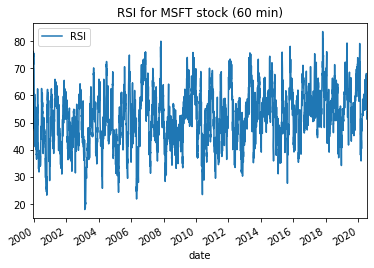

In [22]:
data, meta_data = ti.get_rsi(symbol='MSFT', interval='daily')
data.plot() #figsize=(130,100))
plt.title('RSI for MSFT stock (60 min)')
plt.show()

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '2020-08-01 09:59:00 US/Eastern'}


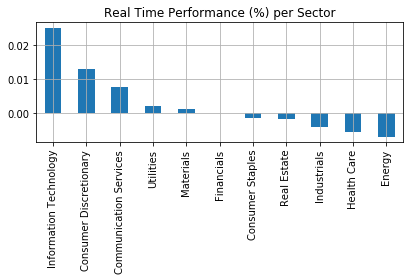

In [26]:
sp = SectorPerformances(key=alpha_vantage_API_KEY, output_format='pandas')
data, meta_data = sp.get_sector()
pprint(meta_data)
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()

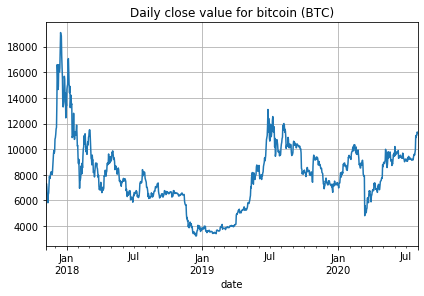

In [27]:
cc = CryptoCurrencies(key=alpha_vantage_API_KEY, output_format='pandas')
data, meta_data = cc.get_digital_currency_daily(symbol='BTC', market='CNY')
data['4b. close (USD)'].plot()
plt.tight_layout()
plt.title('Daily close value for bitcoin (BTC)')
plt.grid()
plt.show()

In [30]:
cc = ForeignExchange(key=alpha_vantage_API_KEY)
# There is no metadata in this call
data, _ = cc.get_currency_exchange_rate(from_currency='USD',to_currency='PLN')
data # pprint(data)

{'1. From_Currency Code': 'USD',
 '2. From_Currency Name': 'United States Dollar',
 '3. To_Currency Code': 'PLN',
 '4. To_Currency Name': 'Polish Zloty',
 '5. Exchange Rate': '3.74400000',
 '6. Last Refreshed': '2020-08-01 14:00:20',
 '7. Time Zone': 'UTC',
 '8. Bid Price': '3.74400000',
 '9. Ask Price': '3.74800000'}

In [34]:
def scoped(sym, indexing_type='date'): # use integer indexing
    ts = TimeSeries(key=alpha_vantage_API_KEY, output_format='pandas', indexing_type=indexing_type) 
    data, meta_data = ts.get_intraday(sym,interval='1min', outputsize='full')
    return (meta_data, data)
pprint(scoped('AAPL')) # , indexing_type='date'
pprint(scoped('AAPL', indexing_type='integer'))

({'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
  '2. Symbol': 'AAPL',
  '3. Last Refreshed': '2020-07-31 20:00:00',
  '4. Interval': '1min',
  '5. Output Size': 'Full size',
  '6. Time Zone': 'US/Eastern'},
                      1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-07-31 20:00:00   427.44   427.60  427.44    427.44     6166.0
2020-07-31 19:59:00   427.51   427.60  427.50    427.51     7784.0
2020-07-31 19:58:00   427.68   427.68  427.51    427.51     4337.0
2020-07-31 19:57:00   427.72   427.83  427.68    427.68     5756.0
2020-07-31 19:56:00   427.80   427.80  427.76    427.76     2675.0
...                      ...      ...     ...       ...        ...
2020-07-20 04:41:00   383.19   383.19  383.19    383.19      270.0
2020-07-20 04:40:00   383.04   383.04  383.04    383.04      100.0
2020-07-20 04:39:00   383.00   383.00  383.00    383.00      200.0
2020-07-20 04:29:00   

In [35]:
#TODO does not work
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

import asyncio

def todo():
    from alpha_vantage.async_support.timeseries import TimeSeries
    async def get_data(symbol):
        ts = TimeSeries(key=alpha_vantage_API_KEY)
        data, _ = await ts.get_quote_endpoint(symbol)
        await ts.close()
        return data

    loop = asyncio.get_event_loop()
    symbols = ['AAPL', 'GOOG', 'TSLA', 'MSFT']
    tasks = [get_data(symbol) for symbol in symbols]
    group1 = asyncio.gather(*tasks)
    results = loop.run_until_complete(group1)
    loop.close()
    print(results)